## Fashion Classifier CNN Model Using Keras  
 
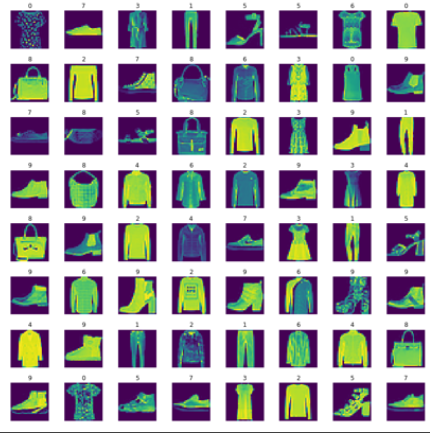

**Fashion-MNIST** dataset serves as a drop-in *replacement for the popular and original MNIST dataset*, but instead of handwritten digits, it consists of small images of **fashion items**. The Fashion-MNIST dataset is often used for tasks such as image classification benchmarking and educational purposes. 

Key details about the Fashion-MNIST dataset:

**Number of Classes:** There are 10 classes in the dataset, each corresponding to a different fashion item. These classes are mutually exclusive, and the goal is to classify each image into one of these categories.

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

**Image Size:** Each image in the dataset is a grayscale image with a size of 28x28 pixels. The pixel values range from 0 to 255, representing the intensity of the grayscale.

**Number of Samples:** Fashion-MNIST contains a total of 60,000 training images and 10,000 testing images.

**Data Format:** The dataset is often provided in a format that is easy to load into machine learning frameworks. Each image is usually a 28x28 pixel array, and the dataset is commonly split into training and testing sets.

**Usage:** Fashion-MNIST is frequently used as a benchmark dataset for testing the performance of machine learning models, particularly in the context of image classification tasks. It provides a more challenging task than the original MNIST dataset, as the images are more complex and diverse.

**Replacement for MNIST:** Fashion-MNIST was introduced as a replacement for the MNIST dataset to address some of its limitations. While MNIST has been widely used, its simplicity (handwritten digits in black and white) doesn't always reflect the challenges of more realistic image classification tasks.



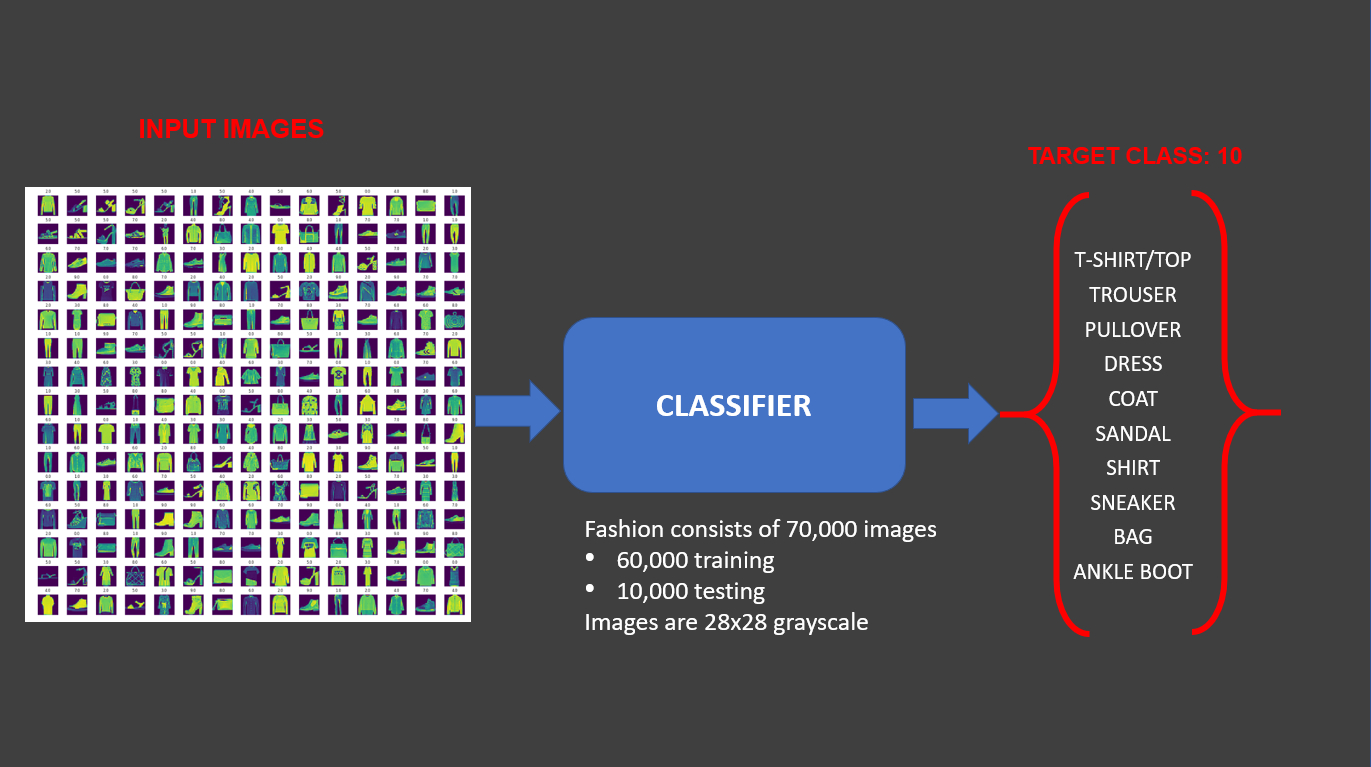

### Importing the Libraries

In [2]:
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [41]:
# Use the same dataset made readily available by keras Using the following lines of code:
import tensorflow as tf
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()



**Check out the sizes of both training and testing datasets**

In [24]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [25]:
y_test.shape

(10000,)

In [26]:
y_train.shape

(60000,)

# TASK #3: PERFORM DATA VISUALIZATION

7


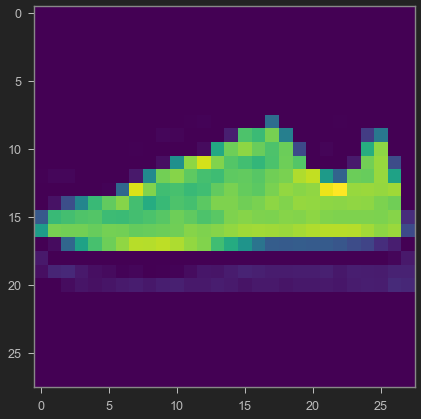

In [43]:
# Select a sample image and visualize it
i= 619
plt.imshow(X_train[i])
print(y_train[i])


The class value obtained is **7 i.e. a sneaker**, and the visual inspection also confirms that.

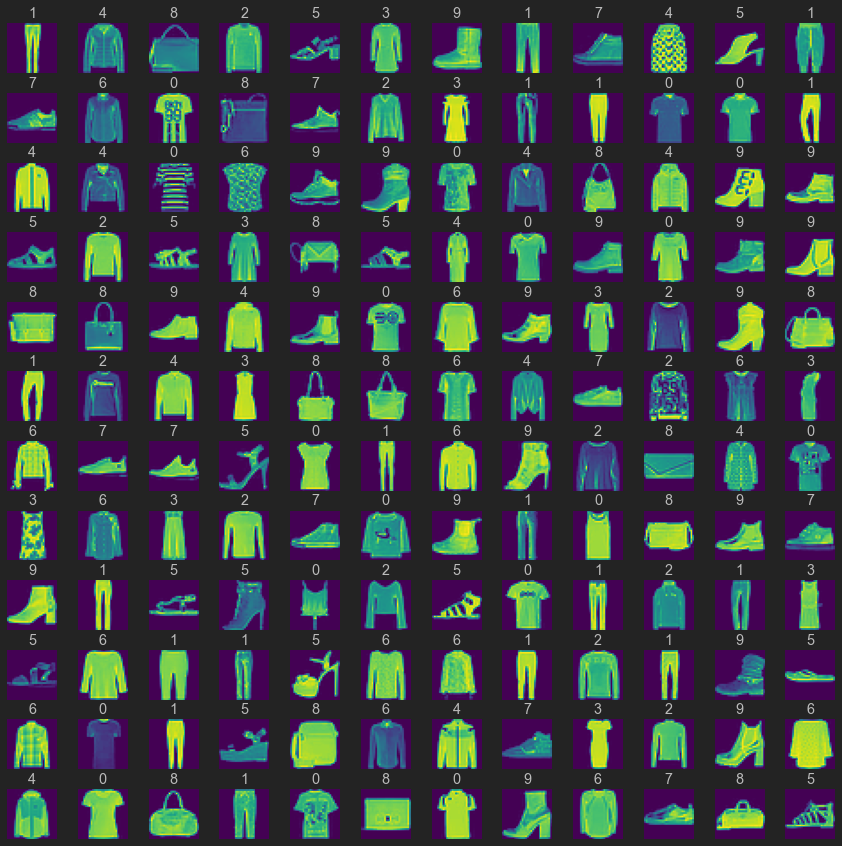

In [44]:
import numpy as np

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

W_grid = 12
L_grid = 12

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel() # flattening the axis

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid): # upto until length and width of grid, 8 x 8
    index = np.random.randint(0, n_training) # pick a random number between 0 and 60k
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
 
    
plt.subplots_adjust(hspace = 0.4)

# as can be seen below comparing the labels with their respective classes, the data looks good

### Preparing the Data For Training

In [45]:
number_cat = 10 # 10 categories or classes in our data
y_train = tf.keras.utils.to_categorical(y_train, number_cat) # converts y_trian to matrix with 0s, and 1s with number of columns equal classes

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
y_train.shape

(60000, 10)

In [48]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [50]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [51]:
X_train.shape

(60000, 28, 28)

In [52]:
X_train = np.expand_dims(X_train, axis=-1) # allows to create an additional dimension (for assigning grayscale color channel)

In [53]:
X_train.shape # 1 indicates 1 layer of grayscale, colored images would have had 3 (3 channels of RGB

(60000, 28, 28, 1)

In [54]:
y_train.shape

(60000, 10)

### Building a Deep Learning Model

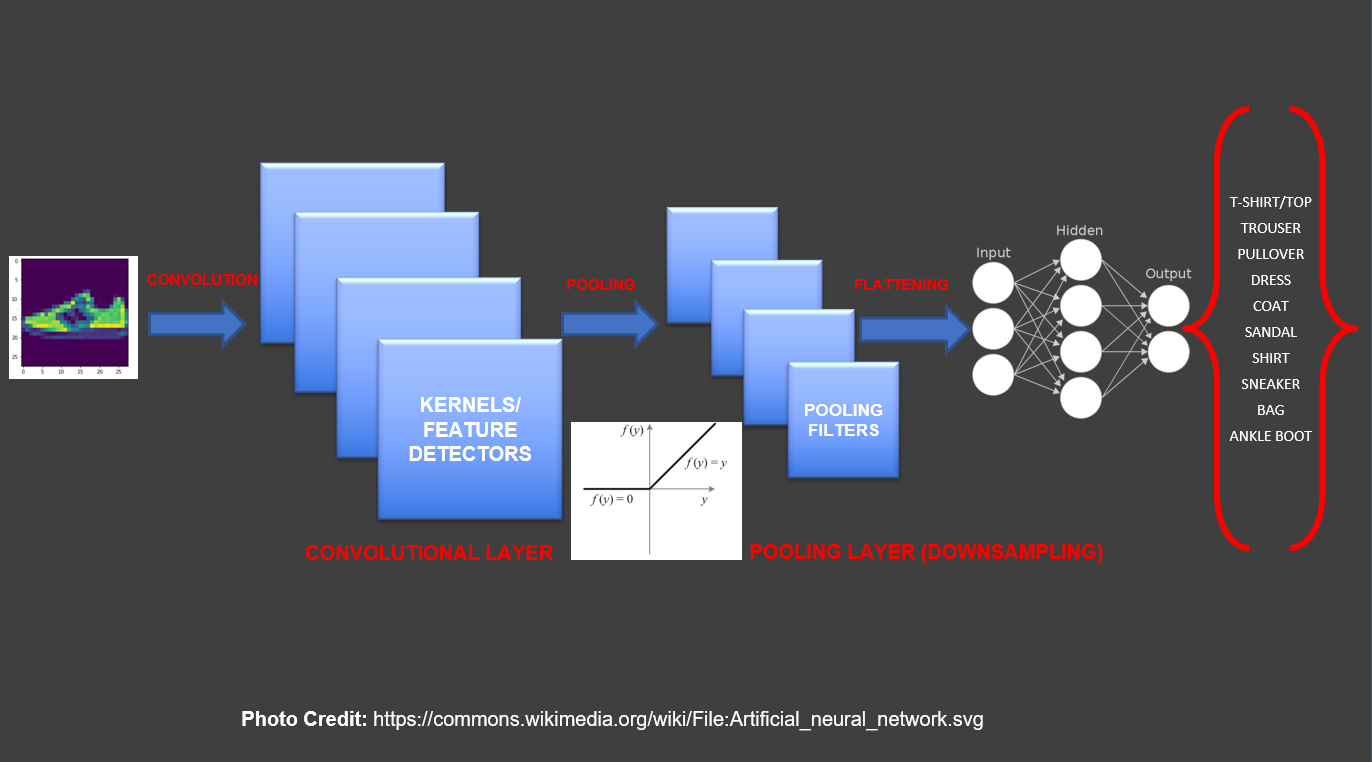

**Convolutional Neural Networks (CNNs)** are a type of neural network architecture commonly employed for image recognition tasks. Structured as a dense neural network, they consist of input, hidden, and output layers. What distinguishes CNNs are the *additional layers*, specifically kernel and convolutional layers, which act as **feature detectors**. These detectors are adept at identifying and extracting diverse features from input images, generating what are known as feature maps. To manage computational complexity and enhance robustness, pooling layers are often incorporated, reducing the dimensionality of the feature maps. Following the convolutional and pooling stages, the resulting representations are flattened into a one-dimensional array, serving as the input for the subsequent dense neural network layers. This hierarchical architecture allows CNNs to **capture hierarchical patterns** and spatial dependencies in images, making them particularly effective for tasks involving visual data.


In [56]:
from tensorflow.keras import datasets, layers, models

# networks are built from left to right sequentially
cnn= models.Sequential()
#32 filters, each filter size is 3 x 3, activation function 'relu', rectified linear units
# relu sets negative to zero, while keeping positive as same, basically introduces non-linearity to system
cnn.add(layers.Conv2D(32, (3,3), activation ='relu', input_shape=  (28, 28, 1))) 
cnn.add(layers.MaxPooling2D(2,2))

# Unlike the generic image shown from wiki, it is possible to add another convolutional layer and pooling as well
cnn.add(layers.Conv2D(64, (3,3), activation ='relu')) #input shape automatically taken from previous layer
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation ='relu')) #input shape automatically taken from previous layer
cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation= 'relu')) # dense neural network layer, 64 neurons

# output layer, since only 10 classes of output
# softmax output layer, converts input vector of real numbers to classes of probabilities
# output between 0 and 1, all 10 neurons outputs add to 1, so if first neuron is majority, then classified as class 1  
cnn.add(layers.Dense(10, activation= 'softmax'))
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

### Compile and Train a Deep Learning Model

- Above we see that 320 trainable parameters in 1 layers and then increases as in seen in summary 

In [57]:
# compiler needs the optimizer to be specified, RMSprop is neural network training optimizer that is adaptive
# loss used is for multi category class, for binary classification problems use binary_crossentropy
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [58]:
X_train.shape

(60000, 28, 28, 1)

In [60]:
epochs= 10 # iteration/run for training of neural network

history = cnn.fit(X_train, y_train, batch_size= 512, epochs= epochs) # 512 is no of images feeding in at once to train


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 1.6842 - accuracy: 0.5996
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.6770 - accuracy: 0.7667
Epoch 3/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.5612 - accuracy: 0.8043
Epoch 4/10
60000/60000 [==============================] - 59s 987us/sample - loss: 0.4958 - accuracy: 0.8249
Epoch 5/10
60000/60000 [==============================] - 59s 988us/sample - loss: 0.4520 - accuracy: 0.8389
Epoch 6/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.4217 - accuracy: 0.8495
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3937 - accuracy: 0.8586
Epoch 8/10
60000/60000 [==============================] - 59s 984us/sample - loss: 0.3743 - accuracy: 0.8659
Epoch 9/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.3557 - accuracy: 0.8722
Epoch 10

### Asses Performance of the Trained Modle

- Increasing the epochs is one way to often achieve higher accuracy
- Another way is to trying different numbers of neurons combination between differnet layers

In [61]:
X_test.shape

(10000, 28, 28)

In [62]:
X_test = np.expand_dims(X_test, axis=-1)

In [63]:
X_test.shape

(10000, 28, 28, 1)

In [64]:
y_test.shape

(10000, 10)

In [65]:
cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 401us/sample - loss: 0.4321 - accuracy: 0.8468 - loss: 0.4324 - accuracy: 0.


[0.4321208557128906, 0.8468]

In [66]:
X_test = X_test.astype('float')


In [67]:
predicted_classes = cnn.predict(X_test)

In [68]:
predicted_classes

# for each of the image, only of the class score is high  indicating the class chosen

array([[2.3830910e-06, 3.4722912e-06, 2.1797307e-06, ..., 3.5937617e-03,
        4.2763975e-05, 9.9414921e-01],
       [2.0477611e-04, 8.7568949e-08, 9.9806577e-01, ..., 2.8696352e-09,
        2.5129730e-06, 2.8339452e-11],
       [6.1109654e-07, 9.9999928e-01, 4.5072284e-09, ..., 2.0424369e-10,
        1.3060887e-07, 1.5338609e-13],
       ...,
       [8.6647970e-07, 3.4622353e-06, 5.7102511e-07, ..., 7.2285843e-06,
        9.9982917e-01, 4.2371870e-12],
       [3.3996894e-08, 1.0000000e+00, 1.3150692e-08, ..., 1.8266800e-09,
        2.8698532e-10, 1.6240802e-11],
       [4.0721688e-03, 4.8284771e-04, 1.4833483e-03, ..., 6.2528807e-01,
        9.7811082e-03, 4.8325658e-03]], dtype=float32)

In [69]:
predicted_classes=np.argmax(predicted_classes,axis=1) # the max argument corresponds to the class chosen


In [71]:
predicted_classes # final predicted classes

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [72]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
y_test = y_test.argmax(1)

In [74]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

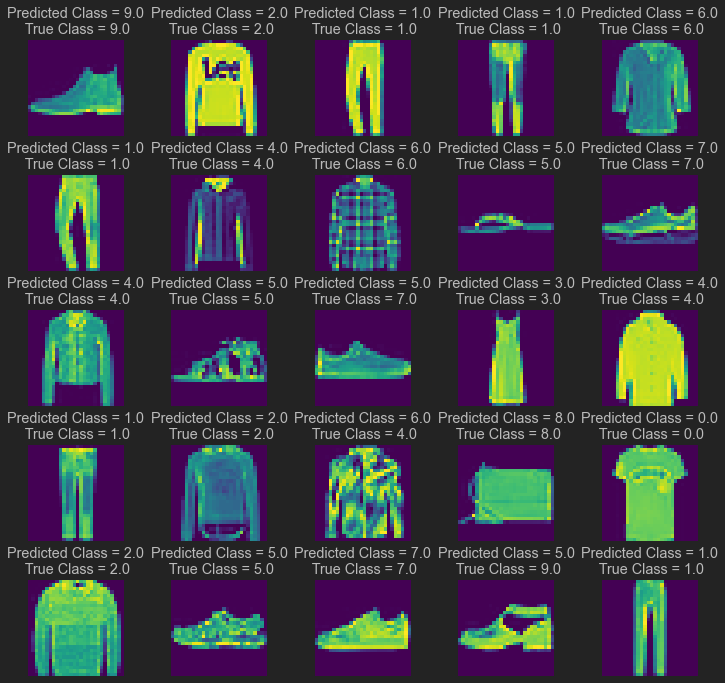

In [75]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)



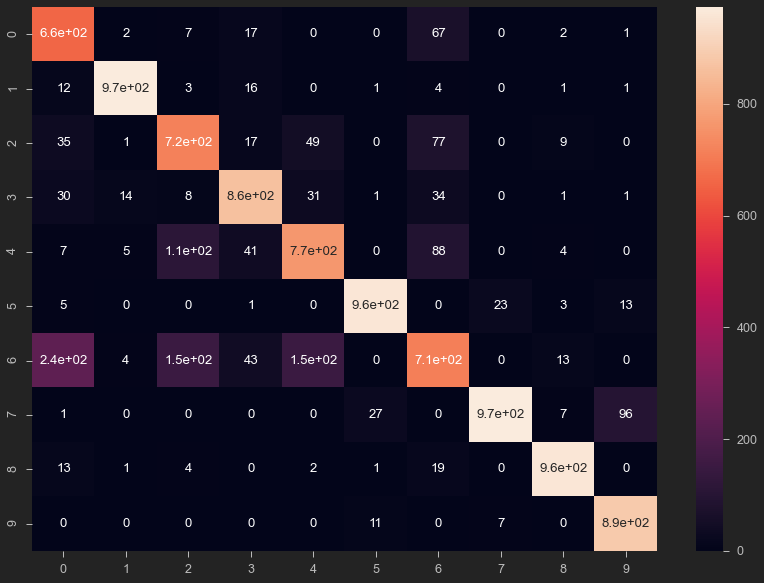

In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(predicted_classes, y_test)
plt.figure(figsize= (14, 10))
sns.heatmap(cm, annot= True)

# model predictions as the rows, versus the ground truth (y_test)
# whenever model predictions match y_truth, the diagonals capture that
# non-diagnonal are wrong cases e.g. 73 samples were predicted as 6, while in reality it was 0

In [79]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes))


              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1000
           1       0.96      0.97      0.97      1000
           2       0.79      0.72      0.75      1000
           3       0.88      0.86      0.87      1000
           4       0.75      0.77      0.76      1000
           5       0.96      0.96      0.96      1000
           6       0.54      0.71      0.62      1000
           7       0.88      0.97      0.92      1000
           8       0.96      0.96      0.96      1000
           9       0.98      0.89      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

